In [1]:
%matplotlib notebook

from gamesopt.train_distributed import train, TrainDistributedConfig
from gamesopt.games import load_game, GameOptions
from gamesopt.optimizer import load_optimizer, OptimizerOptions, OptimizerType
from gamesopt.optimizer.quantization import QuantizationOptions, QuantizationType
import torch
from collections import defaultdict
import matplotlib.pyplot as plt

TrainDistributedConfig(game=GameOptions(game_type=<GameType.QUADRATIC: 'quadratic'>, quadratic_options=QuadraticGameConfig(num_samples=10, dim=2, num_players=2, bias=True, mu=0.0, L=1.0, max_im=1.0), kelly_auction_options=KellyAuctionConfig(bidding_cost=100, ressources=1000, marginal_utility_gains=(1.8, 2.0, 2.2, 2.4)), robust_linear_reg_options=RobustLinRegConfig(num_samples=10, dim=2, lambda_coeff=0.2, gamma_coeff=0.2), bilinear_options=BilinearGameConfig(num_samples=10, dim=2, bias=True)), optimizer=OptimizerOptions(optimizer_type=<OptimizerType.QSGDA: 'QSGDA'>, lr=0.02, lr_e=None, p=None, alpha=0.0, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NORM_Q: 'Norm-quantization'>, k=5)), prox=ProxOptions(prox_type=<ProxType.NONE: 'none'>, l1_reg=0.01, ball_radius=1.0), num_iter=200, seed=1234, name='', save_file=None, load_file=None, precision=1.0, n_process=2)


<IPython.core.display.Javascript object>


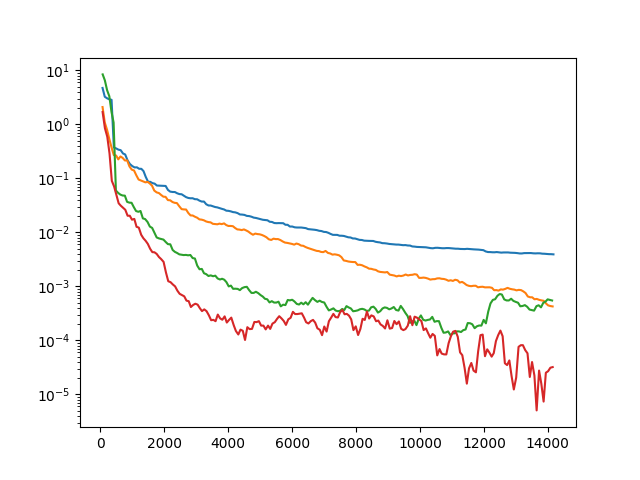

In [10]:
config = TrainDistributedConfig()
config.game.quadratic_options.num_samples = 10
config.game.quadratic_options.dim = 2
config.num_iter = 200
config.game.quadratic_options.bias = True
config.optimizer.quantization_options =  QuantizationOptions(quantization_type=QuantizationType.NORM_Q)
print(config)

plt.figure()
plt.yscale('log')

In [15]:
config.optimizer.lr = 5e-1
config.optimizer.optimizer_type = OptimizerType.QSGDA
record = train(config)
plt.plot(record.metrics.n_bits, record.metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

ProcessRaisedException: 

-- Process 0 terminated with the following error:
Traceback (most recent call last):
  File "/home/hugob/.local/lib/python3.9/site-packages/torch/multiprocessing/spawn.py", line 59, in _wrap
    fn(i, *args)
  File "/home/hugob/Projects/GamesOpt/gamesopt/train_distributed.py", line 29, in _train
    optimizer.step()
  File "/home/hugob/Projects/GamesOpt/gamesopt/optimizer/distributed.py", line 12, in step
    grad, n_bits = self.quantization(self.game.operator(index))
  File "/home/hugob/Projects/GamesOpt/gamesopt/optimizer/quantization.py", line 56, in __call__
    xi = torch.zeros_like(x).bernoulli_(p)
RuntimeError: Expected p_in >= 0 && p_in <= 1 to be true, but got false.  (Could this error message be improved?  If so, please report an enhancement request to PyTorch.)


In [11]:
config.optimizer.lr = 1e-1
config.optimizer.optimizer_type = OptimizerType.DIANA_SGDA
metrics = train(config)
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

In [16]:
config.optimizer.lr = 1e-1
config.optimizer.optimizer_type = OptimizerType.VR_DIANA_SGDA
metrics = train(config)
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

In [23]:
plt.legend()